In [1]:
from google.colab import files
uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("survey lung cancer.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: ylabel='AGE'>

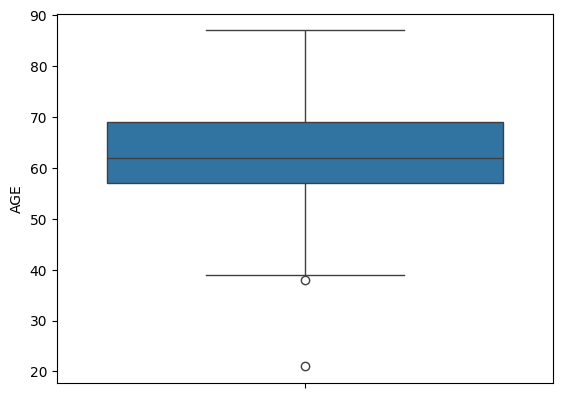

In [25]:
sns.boxplot(df["AGE"])

In [26]:
Q1 = df["AGE"].quantile(0.25)
Q3 = df["AGE"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["AGE"] < lower_bound) | (df["AGE"] > upper_bound)]
outliers

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,F,21,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
238,F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES


In [27]:
# remove outliers

df["AGE"] = np.where(df["AGE"] < 21, df["AGE"].median(), df["AGE"])


<Axes: ylabel='AGE'>

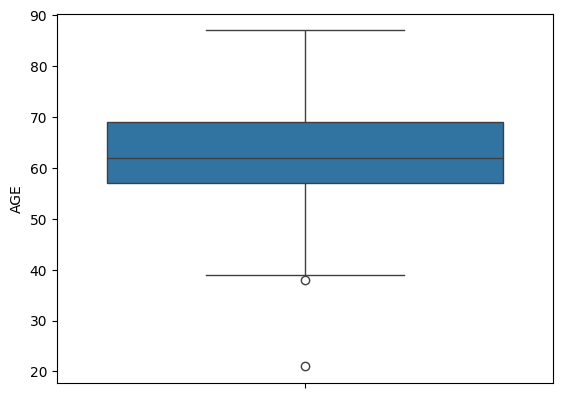

In [28]:
sns.boxplot(df["AGE"])

In [29]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [22]:
# df = pd.get_dummies(df, columns = ["GENDER"])
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,False,True
1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,False,True
2,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,True,False
3,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,False,True
4,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,True,False
305,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,False,True
306,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,False,True
307,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,False,True


#split the data into 4 parts

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
df["Gender_Encoded"] = le.fit_transform(df["GENDER"])


In [33]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Gender_Encoded
0,M,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0
305,M,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,M,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,M,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1


In [34]:
df.drop('GENDER', axis=1, inplace=True)


In [35]:
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Gender_Encoded
0,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0
305,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1


In [37]:
x = df.drop("LUNG_CANCER", axis = 1)
y = df['LUNG_CANCER']


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [46]:
y_predict = clf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_predict)

0.9838709677419355